Sigmoid - Epoch 1, Loss: 0.3612, Accuracy: 92.07%
Sigmoid - Epoch 2, Loss: 0.2084, Accuracy: 94.67%
Sigmoid - Epoch 3, Loss: 0.1522, Accuracy: 95.99%
Sigmoid - Epoch 4, Loss: 0.1195, Accuracy: 96.82%
Sigmoid - Epoch 5, Loss: 0.0981, Accuracy: 97.39%
Sigmoid - Epoch 6, Loss: 0.0828, Accuracy: 97.79%
Sigmoid - Epoch 7, Loss: 0.0711, Accuracy: 98.09%
Sigmoid - Epoch 8, Loss: 0.0618, Accuracy: 98.35%
Sigmoid - Epoch 9, Loss: 0.0543, Accuracy: 98.54%
Sigmoid - Epoch 10, Loss: 0.0479, Accuracy: 98.71%
Sigmoid - Epoch 11, Loss: 0.0425, Accuracy: 98.86%
Sigmoid - Epoch 12, Loss: 0.0379, Accuracy: 99.00%
Sigmoid - Epoch 13, Loss: 0.0338, Accuracy: 99.10%
Sigmoid - Epoch 14, Loss: 0.0303, Accuracy: 99.18%
Sigmoid - Epoch 15, Loss: 0.0272, Accuracy: 99.28%
Sigmoid - Epoch 16, Loss: 0.0244, Accuracy: 99.37%
Sigmoid - Epoch 17, Loss: 0.0220, Accuracy: 99.47%
Sigmoid - Epoch 18, Loss: 0.0199, Accuracy: 99.53%
Sigmoid - Epoch 19, Loss: 0.0181, Accuracy: 99.58%
Sigmoid - Epoch 20, Loss: 0.0164, Accura

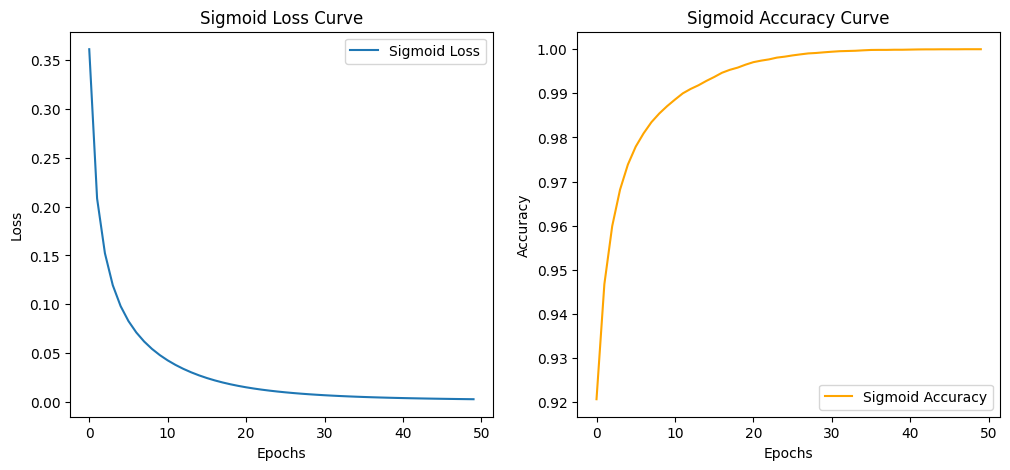

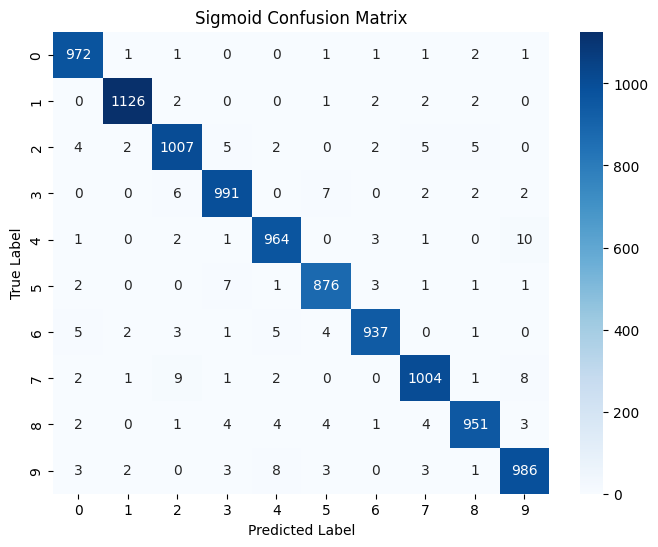

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix

def train_and_evaluate(activation_fn, activation_name):
    # Load MNIST dataset
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize input data
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Reshape input data (flattening 28x28 images into 784-dimensional vectors)
    x_train = x_train.reshape(-1, 784).astype(np.float32)
    x_test = x_test.reshape(-1, 784).astype(np.float32)

    # Convert labels to one-hot encoding
    y_train = np.eye(10)[y_train]
    y_test = np.eye(10)[y_test]

    # Define network parameters
    input_size = 784
    hidden_size = 256

    output_size = 10
    learning_rate = 0.1
    epochs = 50
    batch_size = 10

    # Initialize weights and biases
    W1 = tf.Variable(tf.random.normal([input_size, hidden_size], stddev=0.1))
    b1 = tf.Variable(tf.zeros([hidden_size]))
    W2 = tf.Variable(tf.random.normal([hidden_size, output_size], stddev=0.1))
    b2 = tf.Variable(tf.zeros([output_size]))

    def forward_pass(x):
        hidden = activation_fn(tf.matmul(x, W1) + b1)
        output = tf.matmul(hidden, W2) + b2
        return output

    def compute_loss(logits, labels):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

    # Optimizer
    optimizer = tf.optimizers.SGD(learning_rate)

    def train_step(x_batch, y_batch):
        with tf.GradientTape() as tape:
            logits = forward_pass(x_batch)
            loss = compute_loss(logits, y_batch)
        gradients = tape.gradient(loss, [W1, b1, W2, b2])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
        return loss

    # Training loop
    num_batches = x_train.shape[0] // batch_size
    loss_curve = []
    accuracy_curve = []
    start_time = time.time()

    for epoch in range(epochs):
        avg_loss = 0
        for i in range(num_batches):
            batch_x = x_train[i * batch_size:(i + 1) * batch_size]
            batch_y = y_train[i * batch_size:(i + 1) * batch_size]
            loss = train_step(batch_x, batch_y)
            avg_loss += loss / num_batches
        loss_curve.append(avg_loss.numpy())

        logits_train = forward_pass(x_train)
        predictions_train = tf.argmax(logits_train, axis=1)
        y_train_true = tf.argmax(y_train, axis=1)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions_train, y_train_true), tf.float32))
        accuracy_curve.append(accuracy.numpy())

        print(f"{activation_name} - Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy.numpy() * 100:.2f}%")

    end_time = time.time()
    training_time = end_time - start_time

    # Evaluate model
    logits_test = forward_pass(x_test)
    predictions = tf.argmax(logits_test, axis=1)
    y_true = tf.argmax(y_test, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y_true), tf.float32))
    print(f"{activation_name} - Test Accuracy: {accuracy.numpy() * 100:.2f}%")
    print(f"{activation_name} - Training Time: {training_time:.2f} seconds")

    # Plot loss and accuracy curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_curve, label=f'{activation_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{activation_name} Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracy_curve, label=f'{activation_name} Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{activation_name} Accuracy Curve')
    plt.legend()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_true, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{activation_name} Confusion Matrix')
    plt.show()

# Train and evaluate with sigmoid
train_and_evaluate(tf.nn.sigmoid, "Sigmoid")

Sigmoid - Epoch 1, Loss: 0.3612, Accuracy: 92.00%
Sigmoid - Epoch 2, Loss: 0.2068, Accuracy: 94.53%
Sigmoid - Epoch 3, Loss: 0.1515, Accuracy: 95.86%
Sigmoid - Epoch 4, Loss: 0.1191, Accuracy: 96.77%
Sigmoid - Epoch 5, Loss: 0.0976, Accuracy: 97.33%
Sigmoid - Epoch 6, Loss: 0.0822, Accuracy: 97.71%
Sigmoid - Epoch 7, Loss: 0.0705, Accuracy: 98.04%
Sigmoid - Epoch 8, Loss: 0.0612, Accuracy: 98.29%
Sigmoid - Epoch 9, Loss: 0.0535, Accuracy: 98.50%
Sigmoid - Epoch 10, Loss: 0.0471, Accuracy: 98.63%
Sigmoid - Epoch 11, Loss: 0.0416, Accuracy: 98.80%
Sigmoid - Epoch 12, Loss: 0.0369, Accuracy: 98.95%
Sigmoid - Epoch 13, Loss: 0.0329, Accuracy: 99.06%
Sigmoid - Epoch 14, Loss: 0.0293, Accuracy: 99.18%
Sigmoid - Epoch 15, Loss: 0.0263, Accuracy: 99.29%
Sigmoid - Epoch 16, Loss: 0.0236, Accuracy: 99.38%
Sigmoid - Epoch 17, Loss: 0.0213, Accuracy: 99.45%
Sigmoid - Epoch 18, Loss: 0.0192, Accuracy: 99.52%
Sigmoid - Epoch 19, Loss: 0.0174, Accuracy: 99.58%
Sigmoid - Epoch 20, Loss: 0.0158, Accura

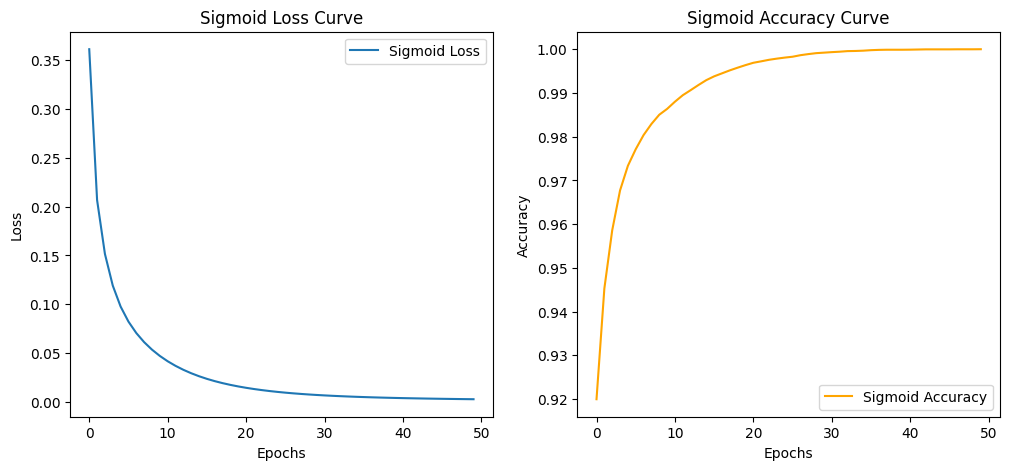

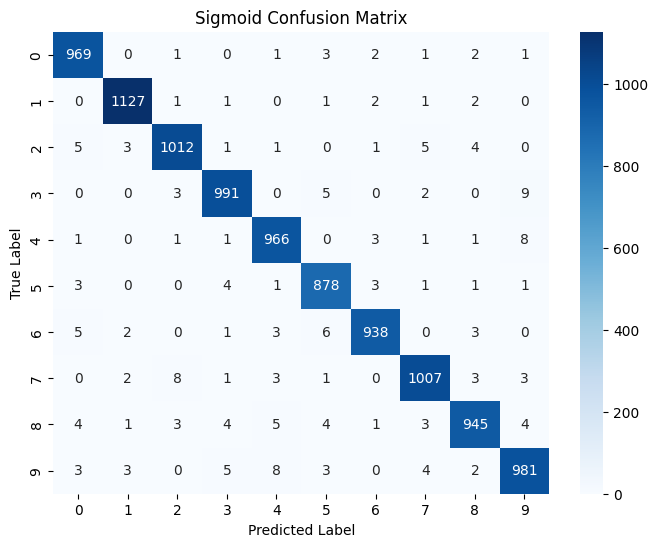

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix

def train_and_evaluate(activation_fn, activation_name):
    # Load MNIST dataset
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize input data
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Reshape input data (flattening 28x28 images into 784-dimensional vectors)
    x_train = x_train.reshape(-1, 784).astype(np.float32)
    x_test = x_test.reshape(-1, 784).astype(np.float32)

    # Convert labels to one-hot encoding
    y_train = np.eye(10)[y_train]
    y_test = np.eye(10)[y_test]

    # Define network parameters
    input_size = 784
    hidden_size = 256

    output_size = 10
    learning_rate = 0.1
    epochs = 50
    batch_size = 10

    # Initialize weights and biases
    W1 = tf.Variable(tf.random.normal([input_size, hidden_size], stddev=0.1))
    b1 = tf.Variable(tf.zeros([hidden_size]))
    W2 = tf.Variable(tf.random.normal([hidden_size, output_size], stddev=0.1))
    b2 = tf.Variable(tf.zeros([output_size]))

    def forward_pass(x):
        hidden = activation_fn(tf.matmul(x, W1) + b1)
        output = tf.matmul(hidden, W2) + b2
        return output

    def compute_loss(logits, labels):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

    # Optimizer
    optimizer = tf.optimizers.SGD(learning_rate)

    def train_step(x_batch, y_batch):
        with tf.GradientTape() as tape:
            logits = forward_pass(x_batch)
            loss = compute_loss(logits, y_batch)
        gradients = tape.gradient(loss, [W1, b1, W2, b2])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
        return loss

    # Training loop
    num_batches = x_train.shape[0] // batch_size
    loss_curve = []
    accuracy_curve = []
    start_time = time.time()

    for epoch in range(epochs):
        avg_loss = 0
        for i in range(num_batches):
            batch_x = x_train[i * batch_size:(i + 1) * batch_size]
            batch_y = y_train[i * batch_size:(i + 1) * batch_size]
            loss = train_step(batch_x, batch_y)
            avg_loss += loss / num_batches
        loss_curve.append(avg_loss.numpy())

        logits_train = forward_pass(x_train)
        predictions_train = tf.argmax(logits_train, axis=1)
        y_train_true = tf.argmax(y_train, axis=1)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions_train, y_train_true), tf.float32))
        accuracy_curve.append(accuracy.numpy())

        print(f"{activation_name} - Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy.numpy() * 100:.2f}%")

    end_time = time.time()
    training_time = end_time - start_time

    # Evaluate model
    logits_test = forward_pass(x_test)
    predictions = tf.argmax(logits_test, axis=1)
    y_true = tf.argmax(y_test, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y_true), tf.float32))
    print(f"{activation_name} - Test Accuracy: {accuracy.numpy() * 100:.2f}%")
    print(f"{activation_name} - Training Time: {training_time:.2f} seconds")

    # Plot loss and accuracy curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_curve, label=f'{activation_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{activation_name} Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracy_curve, label=f'{activation_name} Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{activation_name} Accuracy Curve')
    plt.legend()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_true, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{activation_name} Confusion Matrix')
    plt.show()

# Train and evaluate with sigmoid
train_and_evaluate(tf.nn.sigmoid, "Sigmoid")

Sigmoid - Epoch 1, Loss: 0.3653, Accuracy: 92.38%
Sigmoid - Epoch 2, Loss: 0.2019, Accuracy: 94.75%
Sigmoid - Epoch 3, Loss: 0.1510, Accuracy: 95.92%
Sigmoid - Epoch 4, Loss: 0.1207, Accuracy: 96.75%
Sigmoid - Epoch 5, Loss: 0.1002, Accuracy: 97.31%
Sigmoid - Epoch 6, Loss: 0.0852, Accuracy: 97.74%
Sigmoid - Epoch 7, Loss: 0.0738, Accuracy: 98.04%
Sigmoid - Epoch 8, Loss: 0.0647, Accuracy: 98.29%
Sigmoid - Epoch 9, Loss: 0.0572, Accuracy: 98.49%
Sigmoid - Epoch 10, Loss: 0.0510, Accuracy: 98.68%
Sigmoid - Epoch 11, Loss: 0.0456, Accuracy: 98.80%
Sigmoid - Epoch 12, Loss: 0.0410, Accuracy: 98.94%
Sigmoid - Epoch 13, Loss: 0.0370, Accuracy: 99.07%
Sigmoid - Epoch 14, Loss: 0.0335, Accuracy: 99.17%
Sigmoid - Epoch 15, Loss: 0.0303, Accuracy: 99.27%
Sigmoid - Epoch 16, Loss: 0.0276, Accuracy: 99.36%
Sigmoid - Epoch 17, Loss: 0.0251, Accuracy: 99.42%
Sigmoid - Epoch 18, Loss: 0.0228, Accuracy: 99.48%
Sigmoid - Epoch 19, Loss: 0.0208, Accuracy: 99.55%
Sigmoid - Epoch 20, Loss: 0.0191, Accura

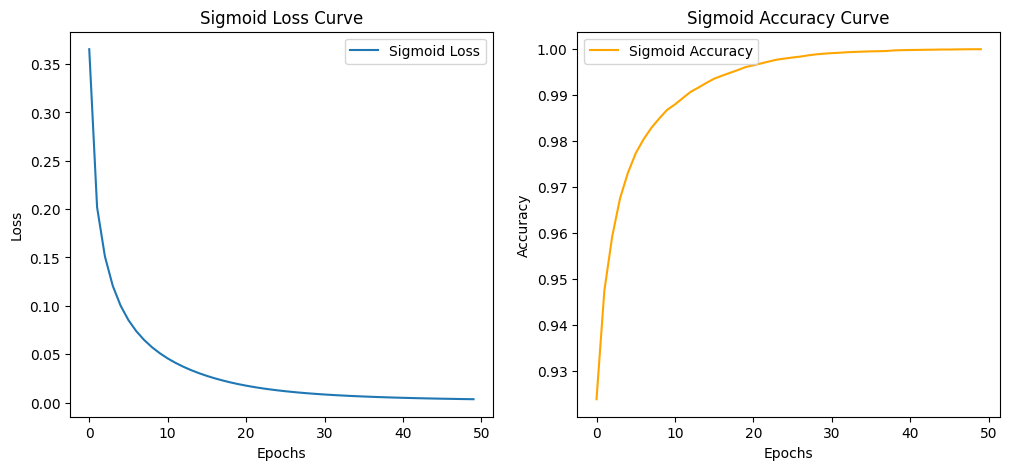

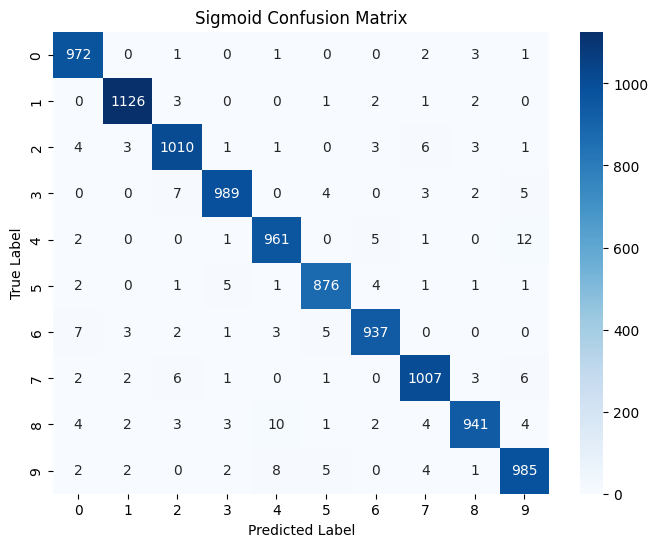

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix

def train_and_evaluate(activation_fn, activation_name):
    # Load MNIST dataset
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize input data
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Reshape input data (flattening 28x28 images into 784-dimensional vectors)
    x_train = x_train.reshape(-1, 784).astype(np.float32)
    x_test = x_test.reshape(-1, 784).astype(np.float32)

    # Convert labels to one-hot encoding
    y_train = np.eye(10)[y_train]
    y_test = np.eye(10)[y_test]

    # Define network parameters
    input_size = 784
    hidden_size = 128
    output_size = 10
    learning_rate = 0.1
    epochs = 50
    batch_size = 10

    # Initialize weights and biases
    W1 = tf.Variable(tf.random.normal([input_size, hidden_size], stddev=0.1))
    b1 = tf.Variable(tf.zeros([hidden_size]))
    W2 = tf.Variable(tf.random.normal([hidden_size, output_size], stddev=0.1))
    b2 = tf.Variable(tf.zeros([output_size]))

    def forward_pass(x):
        hidden = activation_fn(tf.matmul(x, W1) + b1)
        output = tf.matmul(hidden, W2) + b2
        return output

    def compute_loss(logits, labels):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

    # Optimizer
    optimizer = tf.optimizers.SGD(learning_rate)

    def train_step(x_batch, y_batch):
        with tf.GradientTape() as tape:
            logits = forward_pass(x_batch)
            loss = compute_loss(logits, y_batch)
        gradients = tape.gradient(loss, [W1, b1, W2, b2])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
        return loss

    # Training loop
    num_batches = x_train.shape[0] // batch_size
    loss_curve = []
    accuracy_curve = []
    start_time = time.time()

    for epoch in range(epochs):
        avg_loss = 0
        for i in range(num_batches):
            batch_x = x_train[i * batch_size:(i + 1) * batch_size]
            batch_y = y_train[i * batch_size:(i + 1) * batch_size]
            loss = train_step(batch_x, batch_y)
            avg_loss += loss / num_batches
        loss_curve.append(avg_loss.numpy())

        logits_train = forward_pass(x_train)
        predictions_train = tf.argmax(logits_train, axis=1)
        y_train_true = tf.argmax(y_train, axis=1)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions_train, y_train_true), tf.float32))
        accuracy_curve.append(accuracy.numpy())

        print(f"{activation_name} - Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy.numpy() * 100:.2f}%")

    end_time = time.time()
    training_time = end_time - start_time

    # Evaluate model
    logits_test = forward_pass(x_test)
    predictions = tf.argmax(logits_test, axis=1)
    y_true = tf.argmax(y_test, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y_true), tf.float32))
    print(f"{activation_name} - Test Accuracy: {accuracy.numpy() * 100:.2f}%")
    print(f"{activation_name} - Training Time: {training_time:.2f} seconds")

    # Plot loss and accuracy curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_curve, label=f'{activation_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{activation_name} Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracy_curve, label=f'{activation_name} Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{activation_name} Accuracy Curve')
    plt.legend()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_true, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{activation_name} Confusion Matrix')
    plt.show()

# Train and evaluate with sigmoid
train_and_evaluate(tf.nn.sigmoid, "Sigmoid")

Sigmoid - Epoch 1, Loss: 0.3872, Accuracy: 92.73%
Sigmoid - Epoch 2, Loss: 0.1996, Accuracy: 94.74%
Sigmoid - Epoch 3, Loss: 0.1550, Accuracy: 95.79%
Sigmoid - Epoch 4, Loss: 0.1284, Accuracy: 96.48%
Sigmoid - Epoch 5, Loss: 0.1097, Accuracy: 96.95%
Sigmoid - Epoch 6, Loss: 0.0958, Accuracy: 97.37%
Sigmoid - Epoch 7, Loss: 0.0848, Accuracy: 97.72%
Sigmoid - Epoch 8, Loss: 0.0759, Accuracy: 97.94%
Sigmoid - Epoch 9, Loss: 0.0685, Accuracy: 98.15%
Sigmoid - Epoch 10, Loss: 0.0622, Accuracy: 98.35%
Sigmoid - Epoch 11, Loss: 0.0568, Accuracy: 98.50%
Sigmoid - Epoch 12, Loss: 0.0522, Accuracy: 98.60%
Sigmoid - Epoch 13, Loss: 0.0481, Accuracy: 98.71%
Sigmoid - Epoch 14, Loss: 0.0444, Accuracy: 98.82%
Sigmoid - Epoch 15, Loss: 0.0411, Accuracy: 98.91%
Sigmoid - Epoch 16, Loss: 0.0382, Accuracy: 99.01%
Sigmoid - Epoch 17, Loss: 0.0355, Accuracy: 99.08%
Sigmoid - Epoch 18, Loss: 0.0331, Accuracy: 99.16%
Sigmoid - Epoch 19, Loss: 0.0309, Accuracy: 99.21%
Sigmoid - Epoch 20, Loss: 0.0288, Accura

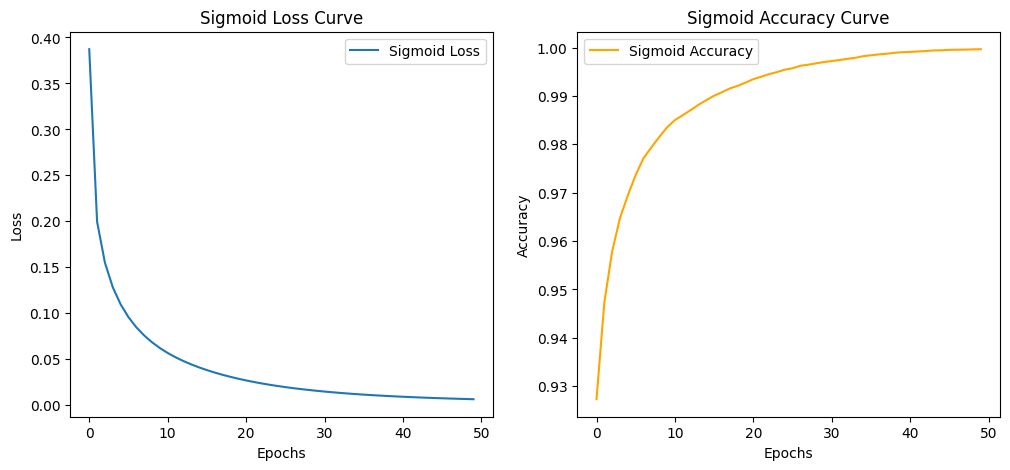

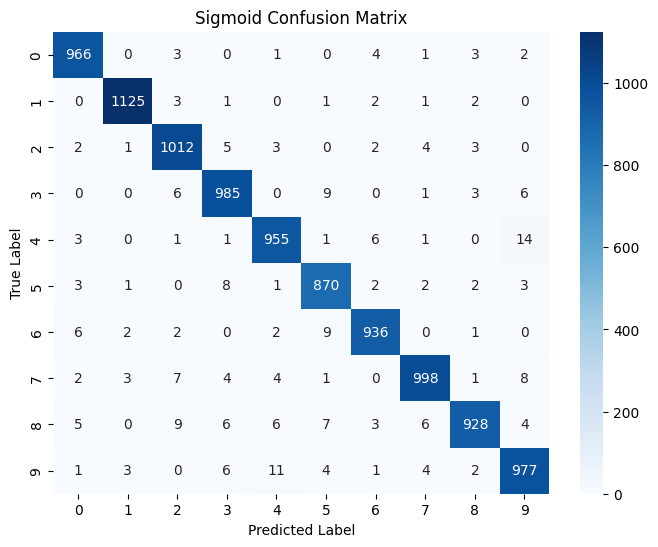

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix

def train_and_evaluate(activation_fn, activation_name):
    # Load MNIST dataset
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize input data
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Reshape input data (flattening 28x28 images into 784-dimensional vectors)
    x_train = x_train.reshape(-1, 784).astype(np.float32)
    x_test = x_test.reshape(-1, 784).astype(np.float32)

    # Convert labels to one-hot encoding
    y_train = np.eye(10)[y_train]
    y_test = np.eye(10)[y_test]

    # Define network parameters
    input_size = 784
    hidden_size = 64
    output_size = 10
    learning_rate = 0.1
    epochs = 50
    batch_size = 10

    # Initialize weights and biases
    W1 = tf.Variable(tf.random.normal([input_size, hidden_size], stddev=0.1))
    b1 = tf.Variable(tf.zeros([hidden_size]))
    W2 = tf.Variable(tf.random.normal([hidden_size, output_size], stddev=0.1))
    b2 = tf.Variable(tf.zeros([output_size]))

    def forward_pass(x):
        hidden = activation_fn(tf.matmul(x, W1) + b1)
        output = tf.matmul(hidden, W2) + b2
        return output

    def compute_loss(logits, labels):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

    # Optimizer
    optimizer = tf.optimizers.SGD(learning_rate)

    def train_step(x_batch, y_batch):
        with tf.GradientTape() as tape:
            logits = forward_pass(x_batch)
            loss = compute_loss(logits, y_batch)
        gradients = tape.gradient(loss, [W1, b1, W2, b2])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
        return loss

    # Training loop
    num_batches = x_train.shape[0] // batch_size
    loss_curve = []
    accuracy_curve = []
    start_time = time.time()

    for epoch in range(epochs):
        avg_loss = 0
        for i in range(num_batches):
            batch_x = x_train[i * batch_size:(i + 1) * batch_size]
            batch_y = y_train[i * batch_size:(i + 1) * batch_size]
            loss = train_step(batch_x, batch_y)
            avg_loss += loss / num_batches
        loss_curve.append(avg_loss.numpy())

        logits_train = forward_pass(x_train)
        predictions_train = tf.argmax(logits_train, axis=1)
        y_train_true = tf.argmax(y_train, axis=1)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions_train, y_train_true), tf.float32))
        accuracy_curve.append(accuracy.numpy())

        print(f"{activation_name} - Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy.numpy() * 100:.2f}%")

    end_time = time.time()
    training_time = end_time - start_time

    # Evaluate model
    logits_test = forward_pass(x_test)
    predictions = tf.argmax(logits_test, axis=1)
    y_true = tf.argmax(y_test, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y_true), tf.float32))
    print(f"{activation_name} - Test Accuracy: {accuracy.numpy() * 100:.2f}%")
    print(f"{activation_name} - Training Time: {training_time:.2f} seconds")

    # Plot loss and accuracy curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_curve, label=f'{activation_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{activation_name} Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracy_curve, label=f'{activation_name} Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{activation_name} Accuracy Curve')
    plt.legend()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_true, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{activation_name} Confusion Matrix')
    plt.show()

# Train and evaluate with sigmoid
train_and_evaluate(tf.nn.sigmoid, "Sigmoid")